In [3]:
import torch
from torch import nn


In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [5]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    
image_path = '/Users/ngocanh/Downloads/catanddog'
walk_through_dir(image_path)

There are 2 directories and 2024 images in '/Users/ngocanh/Downloads/catanddog'.
There are 1 directories and 1 images in '/Users/ngocanh/Downloads/catanddog/training_set'.
There are 2 directories and 1 images in '/Users/ngocanh/Downloads/catanddog/training_set/training_set'.
There are 0 directories and 4006 images in '/Users/ngocanh/Downloads/catanddog/training_set/training_set/dogs'.
There are 0 directories and 4001 images in '/Users/ngocanh/Downloads/catanddog/training_set/training_set/cats'.
There are 1 directories and 1 images in '/Users/ngocanh/Downloads/catanddog/test_set'.
There are 2 directories and 1 images in '/Users/ngocanh/Downloads/catanddog/test_set/test_set'.
There are 0 directories and 1013 images in '/Users/ngocanh/Downloads/catanddog/test_set/test_set/dogs'.
There are 0 directories and 1012 images in '/Users/ngocanh/Downloads/catanddog/test_set/test_set/cats'.


In [6]:
train_dir = '/Users/ngocanh/Downloads/catanddog/training_set/training_set'
test_dir = '/Users/ngocanh/Downloads/catanddog/test_set/test_set'
train_dir, test_dir

('/Users/ngocanh/Downloads/catanddog/training_set/training_set',
 '/Users/ngocanh/Downloads/catanddog/test_set/test_set')

Random image path: /Users/ngocanh/Downloads/catanddog/training_set/training_set/dogs/dog.3491.jpg
Image class: dogs
Image height: 500
Image width: 369


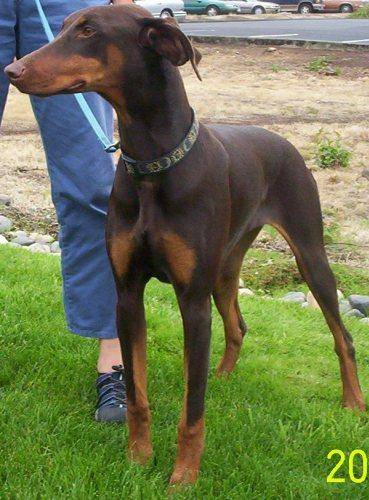

In [7]:
import random
from PIL import Image
import glob
from pathlib import Path
random.seed(42) 
image_path_list= glob.glob(f"{image_path}/*/*/*/*.jpg")
random_image_path = random.choice(image_path_list)
image_class = Path(random_image_path).parent.stem
img = Image.open(random_image_path)
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

(-0.5, 368.5, 499.5, -0.5)

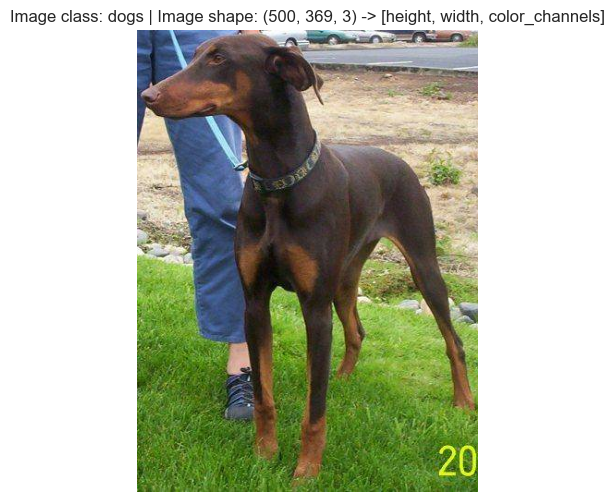

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
img_as_array = np.asarray(img)
plt.figure(figsize=(8, 6))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False) 

In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
image_width = 128
image_height = 128
image_size = (image_width, image_height)
data_transform = transforms.Compose([
    transforms.Resize(size= image_size),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor() #0-255 -- 0-1
])

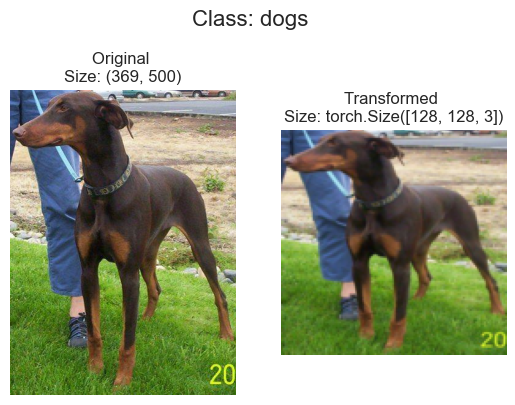

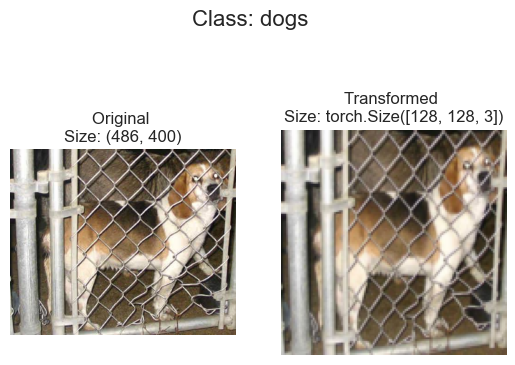

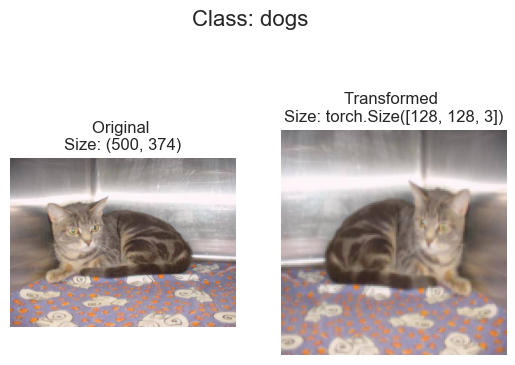

In [10]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")
            fig.suptitle(f"Class: {Path(random_image_path).parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, transform=data_transform, n=3)
        

In [11]:
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,transform = data_transform,target_transform=None)
test_data = datasets.ImageFolder(root = test_dir, transform = data_transform)
print(f"Train data:\n{train_data}\n Test data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 8005
    Root location: /Users/ngocanh/Downloads/catanddog/training_set/training_set
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
 Test data:
Dataset ImageFolder
    Number of datapoints: 2023
    Root location: /Users/ngocanh/Downloads/catanddog/test_set/test_set
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [12]:
class_names = train_data.classes
print('Class names: ',class_names)
class_dict = train_data.class_to_idx
print('Class names as a dict: ',class_dict)
print('The lengths of the trainingtest sets:', len(train_data), len(test_data))


Class names:  ['cats', 'dogs']
Class names as a dict:  {'cats': 0, 'dogs': 1}
The lengths of the trainingtest sets: 8005 2023


In [13]:
img, label = train_data[0][0], train_data[1][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1569, 0.1608, 0.1608,  ..., 0.6196, 0.7765, 0.7882],
         [0.1529, 0.1490, 0.1490,  ..., 0.6118, 0.7529, 0.7882],
         [0.1490, 0.1333, 0.1333,  ..., 0.6118, 0.7373, 0.7882],
         ...,
         [0.0863, 0.0784, 0.0784,  ..., 0.2392, 0.2627, 0.1725],
         [0.1098, 0.0902, 0.0863,  ..., 0.2196, 0.1804, 0.1725],
         [0.1176, 0.0902, 0.0863,  ..., 0.2431, 0.1804, 0.1765]],

        [[0.1765, 0.1765, 0.1725,  ..., 0.6235, 0.7686, 0.7725],
         [0.1725, 0.1647, 0.1608,  ..., 0.6118, 0.7373, 0.7686],
         [0.1686, 0.1490, 0.1451,  ..., 0.6039, 0.7137, 0.7608],
         ...,
         [0.0784, 0.0706, 0.0706,  ..., 0.1725, 0.2078, 0.1255],
         [0.1020, 0.0824, 0.0784,  ..., 0.1569, 0.1255, 0.1255],
         [0.1098, 0.0824, 0.0784,  ..., 0.1804, 0.1255, 0.1373]],

        [[0.1608, 0.1765, 0.1922,  ..., 0.5843, 0.6706, 0.6431],
         [0.1569, 0.1647, 0.1804,  ..., 0.5804, 0.6471, 0.6510],
         [0.1529, 0.1490, 0.1647,  ..., 0.58

Original shape: torch.Size([3, 128, 128]) -> [color_channels, height, width]
Image permute shape: torch.Size([128, 128, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'cats')

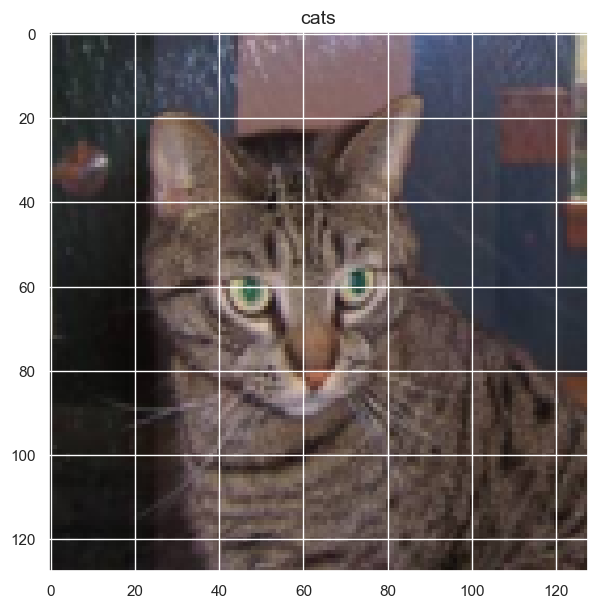

In [14]:
img_permute = img.permute(1, 2, 0)
print(f'Original shape: {img.shape} -> [color_channels, height, width]')
print(f'Image permute shape: {img_permute.shape} -> [height, width, color_channels]')
plt.figure(figsize=(10,7))
plt.imshow(img.permute(1, 2, 0))
plt.axis('on')
plt.title(class_names[label], fontsize=14)

In [15]:
Num_Workers = os.cpu_count()
train_dataloader = DataLoader(dataset=train_data,num_workers=Num_Workers, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=1,num_workers=Num_Workers, shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x14e52b750>,
 <torch.utils.data.dataloader.DataLoader at 0x14e340550>)

In [16]:
img, label = next(iter(train_dataloader))

# = batch size will now be 1.  
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 128, 128]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [17]:
image_width = 224
image_height = 224
image_size = (image_width, image_height)
train_transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor()]
)
test_transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor()
])
#load data voi du lieu da tang cuong tranh overfitting
train_data_augmented = datasets.ImageFolder(train_dir, transform = train_transform)
test_data_augemented = datasets.ImageFolder(test_dir, transform= test_transform)
train_data_augmented, test_data_augemented

(Dataset ImageFolder
     Number of datapoints: 8005
     Root location: /Users/ngocanh/Downloads/catanddog/training_set/training_set
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 2023
     Root location: /Users/ngocanh/Downloads/catanddog/test_set/test_set
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [18]:
BATCH_SIZE = 32
torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size = BATCH_SIZE,
                                        shuffle = True, 
                                        num_workers = Num_Workers)
test_dataloader_augemented = DataLoader(test_data_augemented,
                                        batch_size = BATCH_SIZE,
                                        shuffle = False,
                                        num_workers = Num_Workers)
train_dataloader_augmented, test_dataloader_augemented

(<torch.utils.data.dataloader.DataLoader at 0x14e31a950>,
 <torch.utils.data.dataloader.DataLoader at 0x14e519f10>)

In [19]:
class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2)
        )
        self.conv_layer_2 = nn.Sequential(
            nn.Conv2d(64, 512, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(2)
        )
        self.conv_layer_3 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=512*3*3, out_features=2)
        )
    def forward(self, x: torch.Tensor):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.classifier(x)
        return x
model = ImageClassifier(). to(device)
#build model 3 lopws tich chap 

In [20]:

img_batch, label_batch = next(iter(train_dataloader_augmented))

#  Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")
model.eval()
with torch.inference_mode():
    pred = model(img_single.to(device))
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 224, 224])

Output logits:
tensor([[-0.0116, -0.0099]])

Output prediction probabilities:
tensor([[0.4996, 0.5004]])

Output prediction label:
tensor([1])

Actual label:
1


In [21]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    model.train()
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    model.eval() 
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [22]:
from tqdm.auto import tqdm
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    return results

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
import torch 
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

NUM_EPOCHS = 25

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params= model.parameters(), lr=1e-3)

from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_results = train(model=model,
                      train_dataloader=train_dataloader_augmented,
                      test_dataloader=test_dataloader_augemented,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:35<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
def plot_loss_curves(results):
  
    results = dict(list(model_results.items()))

    loss = results['train_loss']
    test_loss = results['test_loss']

    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plot_loss_curves(model_results)

In [ ]:
custom_image_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
])
custom_image_transformed = custom_image_transform(custom_image)

print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

In [ ]:
model.eval()
with torch.inference_mode():
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")
    custom_image_pred = model(custom_image_transformed.unsqueeze(dim=0).to(device))
custom_image_pred

In [ ]:
print(f"Prediction logits: {custom_image_pred}")
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] 
custom_image_pred_class
plt.imshow(custom_image.permute(1, 2, 0)) 
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False)